In [1]:
import json
import re 
import copy
import graphviz
import sys
import clingo
import clingo.symbol as symbol
from importlib import reload

In [2]:
# This is a hack to make the library in the parent folder available for imoprts
# A better solution is by np8 here:
# https://stackoverflow.com/questions/714063/importing-modules-from-parent-folder
import sys
import os
import inspect

thisdir = sys.path[0]
print(f"thisdir = {thisdir}")
parentdir = os.path.dirname(thisdir)
#print(f"parentdir = {parentdir}")
if not parentdir in sys.path:
    print("Adding parent directory to python path")
    sys.path.insert(1, parentdir)
else:
    print("Skipping adding parent direct to path (there already)")

print(f"sys.path =\n{sys.path}")


thisdir = /home/luke/git/external/asp_recipe_graphs/notebooks
Adding parent directory to python path
sys.path =
['/home/luke/git/external/asp_recipe_graphs/notebooks', '/home/luke/git/external/asp_recipe_graphs', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/home/luke/.local/lib/python3.10/site-packages', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/lib/python3.10/dist-packages']


In [3]:
## local modules
os.environ["GRASP_SRC_DIR"] = '..'


import asp_recipe_graphs.api.asp2graph
reload(asp_recipe_graphs.api.asp2graph)
from asp_recipe_graphs.api.asp2graph import create_dependency_graph
from asp_recipe_graphs.api.asp2graph import get_graphs
from asp_recipe_graphs.api.asp2graph import typed_arcs_to_dot
from asp_recipe_graphs.api.asp2graph import get_type_functions
from asp_recipe_graphs.api.asp2graph import get_recipes
from asp_recipe_graphs.api.asp2graph import recipe_graph_to_dot



# Processing ASP Output

Here we look at how to process the string output of various calls to the asp solver. In particular, we are interested in plotting unlabelled recipe graphs, and labelled recipe graphs (graphs and a typing function).

## Graphs (unlabelled)

In [4]:
# we can get asp models for just the graphs by running the query "arcs"
# in asp_recipe_graphs.api.solver.load_and_solve
asp_model = 'in(arcs(rg_hummus),arc(c(0),a(0))) in(arcs(rg_hummus),arc(a(0),c(6))) in(arcs(rg_hummus),arc(c(1),a(1))) in(arcs(rg_hummus),arc(c(2),a(1))) in(arcs(rg_hummus),arc(c(3),a(1))) in(arcs(rg_hummus),arc(c(4),a(1))) in(arcs(rg_hummus),arc(c(5),a(1))) in(arcs(rg_hummus),arc(c(6),a(1))) in(arcs(rg_hummus),arc(a(1),c(8))) in(arcs(rg_hummus),arc(c(7),a(2))) in(arcs(rg_hummus),arc(a(2),c(9))) in(arcs(rg_hummus),arc(c(8),a(3))) in(arcs(rg_hummus),arc(c(9),a(3))) in(arcs(rg_hummus),arc(a(3),c(10))) in(a_nodes(rg_hummus),a(0)) in(a_nodes(rg_hummus),a(1)) in(a_nodes(rg_hummus),a(2)) in(a_nodes(rg_hummus),a(3)) in(c_nodes(rg_hummus),c(0)) in(c_nodes(rg_hummus),c(1)) in(c_nodes(rg_hummus),c(2)) in(c_nodes(rg_hummus),c(3)) in(c_nodes(rg_hummus),c(4)) in(c_nodes(rg_hummus),c(5)) in(c_nodes(rg_hummus),c(6)) in(c_nodes(rg_hummus),c(7)) in(c_nodes(rg_hummus),c(8)) in(c_nodes(rg_hummus),c(9)) in(c_nodes(rg_hummus),c(10)) in(nodes(rg_hummus),a(0)) in(nodes(rg_hummus),a(1)) in(nodes(rg_hummus),a(2)) in(nodes(rg_hummus),a(3)) in(nodes(rg_hummus),c(0)) in(nodes(rg_hummus),c(1)) in(nodes(rg_hummus),c(2)) in(nodes(rg_hummus),c(3)) in(nodes(rg_hummus),c(4)) in(nodes(rg_hummus),c(5)) in(nodes(rg_hummus),c(6)) in(nodes(rg_hummus),c(7)) in(nodes(rg_hummus),c(8)) in(nodes(rg_hummus),c(9)) in(nodes(rg_hummus),c(10))'
asp_model = 'in(arcs(rg_cannellini_hummus),arc(c(0),a(0))) in(arcs(rg_cannellini_hummus),arc(c(1),a(0))) in(arcs(rg_cannellini_hummus),arc(c(2),a(0))) in(arcs(rg_cannellini_hummus),arc(a(0),c(3))) in(arcs(rg_cannellini_hummus),arc(c(4),a(1))) in(arcs(rg_cannellini_hummus),arc(a(1),c(5))) in(arcs(rg_cannellini_hummus),arc(c(6),a(2))) in(arcs(rg_cannellini_hummus),arc(a(2),c(7))) in(arcs(rg_cannellini_hummus),arc(c(8),a(3))) in(arcs(rg_cannellini_hummus),arc(a(3),c(9))) in(arcs(rg_cannellini_hummus),arc(c(10),a(5))) in(arcs(rg_cannellini_hummus),arc(a(5),c(11))) in(arcs(rg_cannellini_hummus),arc(c(12),a(6))) in(arcs(rg_cannellini_hummus),arc(a(6),c(13))) in(arcs(rg_cannellini_hummus),arc(c(5),a(7))) in(arcs(rg_cannellini_hummus),arc(c(7),a(7))) in(arcs(rg_cannellini_hummus),arc(c(9),a(7))) in(arcs(rg_cannellini_hummus),arc(c(13),a(7))) in(arcs(rg_cannellini_hummus),arc(a(7),c(14))) in(arcs(rg_cannellini_hummus),arc(c(3),a(8))) in(arcs(rg_cannellini_hummus),arc(c(14),a(8))) in(arcs(rg_cannellini_hummus),arc(a(8),c(15))) in(arcs(rg_cannellini_hummus),arc(c(8),a(9))) in(arcs(rg_cannellini_hummus),arc(a(9),c(9))) in(arcs(rg_cannellini_hummus),arc(c(3),a(7))) in(arcs(rg_cannellini_hummus),arc(c(14),a(7))) in(arcs(rg_cannellini_hummus),arc(a(7),c(15))) in(a_nodes(rg_cannellini_hummus),a(0)) in(a_nodes(rg_cannellini_hummus),a(1)) in(a_nodes(rg_cannellini_hummus),a(2)) in(a_nodes(rg_cannellini_hummus),a(3)) in(a_nodes(rg_cannellini_hummus),a(5)) in(a_nodes(rg_cannellini_hummus),a(6)) in(a_nodes(rg_cannellini_hummus),a(7)) in(a_nodes(rg_cannellini_hummus),a(8)) in(a_nodes(rg_cannellini_hummus),a(9)) in(c_nodes(rg_cannellini_hummus),c(0)) in(c_nodes(rg_cannellini_hummus),c(1)) in(c_nodes(rg_cannellini_hummus),c(2)) in(c_nodes(rg_cannellini_hummus),c(4)) in(c_nodes(rg_cannellini_hummus),c(6)) in(c_nodes(rg_cannellini_hummus),c(8)) in(c_nodes(rg_cannellini_hummus),c(10)) in(c_nodes(rg_cannellini_hummus),c(12)) in(c_nodes(rg_cannellini_hummus),c(5)) in(c_nodes(rg_cannellini_hummus),c(7)) in(c_nodes(rg_cannellini_hummus),c(9)) in(c_nodes(rg_cannellini_hummus),c(13)) in(c_nodes(rg_cannellini_hummus),c(3)) in(c_nodes(rg_cannellini_hummus),c(14)) in(c_nodes(rg_cannellini_hummus),c(11)) in(c_nodes(rg_cannellini_hummus),c(15)) in(nodes(rg_cannellini_hummus),a(0)) in(nodes(rg_cannellini_hummus),a(1)) in(nodes(rg_cannellini_hummus),a(2)) in(nodes(rg_cannellini_hummus),a(3)) in(nodes(rg_cannellini_hummus),a(5)) in(nodes(rg_cannellini_hummus),a(6)) in(nodes(rg_cannellini_hummus),a(7)) in(nodes(rg_cannellini_hummus),a(8)) in(nodes(rg_cannellini_hummus),a(9)) in(nodes(rg_cannellini_hummus),c(0)) in(nodes(rg_cannellini_hummus),c(1)) in(nodes(rg_cannellini_hummus),c(2)) in(nodes(rg_cannellini_hummus),c(4)) in(nodes(rg_cannellini_hummus),c(6)) in(nodes(rg_cannellini_hummus),c(8)) in(nodes(rg_cannellini_hummus),c(10)) in(nodes(rg_cannellini_hummus),c(12)) in(nodes(rg_cannellini_hummus),c(5)) in(nodes(rg_cannellini_hummus),c(7)) in(nodes(rg_cannellini_hummus),c(9)) in(nodes(rg_cannellini_hummus),c(13)) in(nodes(rg_cannellini_hummus),c(3)) in(nodes(rg_cannellini_hummus),c(14)) in(nodes(rg_cannellini_hummus),c(11)) in(nodes(rg_cannellini_hummus),c(15))'

In [5]:
# get_graphs(...) extracts a collection of arcs for each unique graph in an asp model
# output string
graphs = get_graphs(asp_model)
graphs

{'rg_cannellini_hummus': [{'type_': 'ca', 'source': 'c0', 'target': 'a0'},
  {'type_': 'ca', 'source': 'c1', 'target': 'a0'},
  {'type_': 'ca', 'source': 'c2', 'target': 'a0'},
  {'type_': 'ac', 'source': 'a0', 'target': 'c3'},
  {'type_': 'ca', 'source': 'c4', 'target': 'a1'},
  {'type_': 'ac', 'source': 'a1', 'target': 'c5'},
  {'type_': 'ca', 'source': 'c6', 'target': 'a2'},
  {'type_': 'ac', 'source': 'a2', 'target': 'c7'},
  {'type_': 'ca', 'source': 'c8', 'target': 'a3'},
  {'type_': 'ac', 'source': 'a3', 'target': 'c9'},
  {'type_': 'ca', 'source': 'c10', 'target': 'a5'},
  {'type_': 'ac', 'source': 'a5', 'target': 'c11'},
  {'type_': 'ca', 'source': 'c12', 'target': 'a6'},
  {'type_': 'ac', 'source': 'a6', 'target': 'c13'},
  {'type_': 'ca', 'source': 'c5', 'target': 'a7'},
  {'type_': 'ca', 'source': 'c7', 'target': 'a7'},
  {'type_': 'ca', 'source': 'c9', 'target': 'a7'},
  {'type_': 'ca', 'source': 'c13', 'target': 'a7'},
  {'type_': 'ac', 'source': 'a7', 'target': 'c14'},
 

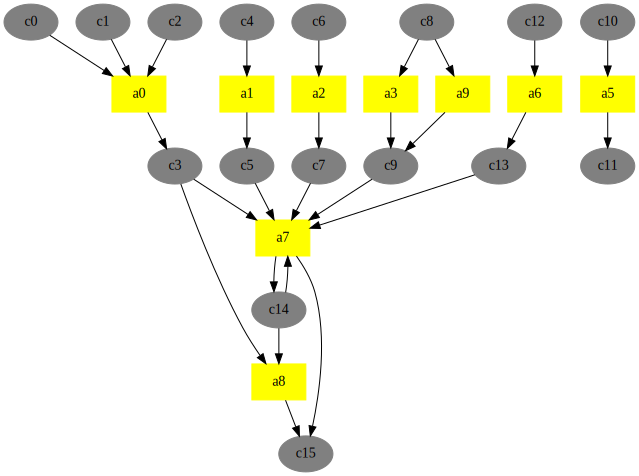

In [6]:
# typed_arcs_to_dot draws the unlabelled graph (good to identify problems)

#dot = typed_arcs_to_dot(graphs['rg_hummus'])
dot = typed_arcs_to_dot(graphs['rg_cannellini_hummus'])
dot

## Types


In [7]:
# we can get asp models for just the type functions by running the query "types"
# in asp_recipe_graphs.api.solver.load_and_solve
asp_model = 'type_of(tf_hummus,c(0),"whole garlic") type_of(tf_hummus,c(1),"tahini") type_of(tf_hummus,c(2),"salt") type_of(tf_hummus,c(3),"lemon juice") type_of(tf_hummus,c(4),"olive oil") type_of(tf_hummus,c(5),"water") type_of(tf_hummus,c(6),"diced garlic") type_of(tf_hummus,c(7),"tinned chick peas") type_of(tf_hummus,c(8),"tahini mixture") type_of(tf_hummus,c(9),"rinsed chick peas") type_of(tf_hummus,c(10),"hummus") type_of(tf_hummus,a(0),"dice") type_of(tf_hummus,a(1),"blend until uniform") type_of(tf_hummus,a(2),"rinse and drain") type_of(tf_hummus,a(3),"blend together")'


In [8]:
# get_type_functions gets a type function mapping for each unique type_function 
# in an asp model string
type_functions = get_type_functions(asp_model)
type_functions

{'tf_hummus': {'c0': '"whole garlic"',
  'c1': '"tahini"',
  'c2': '"salt"',
  'c3': '"lemon juice"',
  'c4': '"olive oil"',
  'c5': '"water"',
  'c6': '"diced garlic"',
  'c7': '"tinned chick peas"',
  'c8': '"tahini mixture"',
  'c9': '"rinsed chick peas"',
  'c10': '"hummus"',
  'a0': '"dice"',
  'a1': '"blend until uniform"',
  'a2': '"rinse and drain"',
  'a3': '"blend together"'}}

# Recipes

In [9]:
# # we can get asp recipes for just the graph, type_function associations
# # by running the query "bare recipes"
# # in asp_recipe_graphs.api.solver.load_and_solve
# asp_model = 'recipe(rg_hummus,tf_hummus)'

# we can get asp recipes including graphs, type_functions and  (graph, type_function)
# associations by running the query "recipes"
# in asp_recipe_graphs.api.solver.load_and_solve
asp_model = ' in(arcs(rg_hummus),arc(c(0),a(0))) in(arcs(rg_hummus),arc(a(0),c(6))) in(arcs(rg_hummus),arc(c(1),a(1))) in(arcs(rg_hummus),arc(c(2),a(1))) in(arcs(rg_hummus),arc(c(3),a(1))) in(arcs(rg_hummus),arc(c(4),a(1))) in(arcs(rg_hummus),arc(c(5),a(1))) in(arcs(rg_hummus),arc(c(6),a(1))) in(arcs(rg_hummus),arc(a(1),c(8))) in(arcs(rg_hummus),arc(c(7),a(2))) in(arcs(rg_hummus),arc(a(2),c(9))) in(arcs(rg_hummus),arc(c(8),a(3))) in(arcs(rg_hummus),arc(c(9),a(3))) in(arcs(rg_hummus),arc(a(3),c(10))) in(acts(rg_hummus),a(0)) in(acts(rg_hummus),a(1)) in(acts(rg_hummus),a(2)) in(acts(rg_hummus),a(3)) in(mid(rg_hummus),c(6)) in(mid(rg_hummus),c(8)) in(mid(rg_hummus),c(9)) in(out(rg_hummus),c(10)) in(in(rg_hummus),c(0)) in(in(rg_hummus),c(1)) in(in(rg_hummus),c(2)) in(in(rg_hummus),c(3)) in(in(rg_hummus),c(4)) in(in(rg_hummus),c(5)) in(in(rg_hummus),c(7)) in(c_nodes(rg_hummus),c(0)) in(c_nodes(rg_hummus),c(1)) in(c_nodes(rg_hummus),c(2)) in(c_nodes(rg_hummus),c(3)) in(c_nodes(rg_hummus),c(4)) in(c_nodes(rg_hummus),c(5)) in(c_nodes(rg_hummus),c(6)) in(c_nodes(rg_hummus),c(7)) in(c_nodes(rg_hummus),c(8)) in(c_nodes(rg_hummus),c(9)) in(c_nodes(rg_hummus),c(10)) in(a_nodes(rg_hummus),a(0)) in(a_nodes(rg_hummus),a(1)) in(a_nodes(rg_hummus),a(2)) in(a_nodes(rg_hummus),a(3)) in(nodes(rg_hummus),a(0)) in(nodes(rg_hummus),a(1)) in(nodes(rg_hummus),a(2)) in(nodes(rg_hummus),a(3)) in(nodes(rg_hummus),c(0)) in(nodes(rg_hummus),c(1)) in(nodes(rg_hummus),c(2)) in(nodes(rg_hummus),c(3)) in(nodes(rg_hummus),c(4)) in(nodes(rg_hummus),c(5)) in(nodes(rg_hummus),c(6)) in(nodes(rg_hummus),c(7)) in(nodes(rg_hummus),c(8)) in(nodes(rg_hummus),c(9)) in(nodes(rg_hummus),c(10)) recipe(rg_hummus,tf_hummus) type_of(tf_hummus,c(0),"whole garlic") type_of(tf_hummus,c(1),"tahini") type_of(tf_hummus,c(2),"salt") type_of(tf_hummus,c(3),"lemon juice") type_of(tf_hummus,c(4),"olive oil") type_of(tf_hummus,c(5),"water") type_of(tf_hummus,c(6),"diced garlic") type_of(tf_hummus,c(7),"tinned chick peas") type_of(tf_hummus,c(8),"tahini mixture") type_of(tf_hummus,c(9),"rinsed chick peas") type_of(tf_hummus,c(10),"hummus") type_of(tf_hummus,a(0),"dice") type_of(tf_hummus,a(1),"blend until uniform") type_of(tf_hummus,a(2),"rinse and drain") type_of(tf_hummus,a(3),"blend together")'
asp_model = '''in(arcs(rg_cannellini_hummus),arc(c(0),a(0)))
    in(arcs(rg_cannellini_hummus),arc(c(1),a(0)))
    in(arcs(rg_cannellini_hummus),arc(c(2),a(0)))
    in(arcs(rg_cannellini_hummus),arc(a(0),c(3)))
    in(arcs(rg_cannellini_hummus),arc(c(4),a(1)))
    in(arcs(rg_cannellini_hummus),arc(a(1),c(5)))
    in(arcs(rg_cannellini_hummus),arc(c(6),a(2)))
    in(arcs(rg_cannellini_hummus),arc(a(2),c(7)))
    in(arcs(rg_cannellini_hummus),arc(c(8),a(3)))
    in(arcs(rg_cannellini_hummus),arc(a(3),c(9)))
    in(arcs(rg_cannellini_hummus),arc(c(1),a(4)))
    in(arcs(rg_cannellini_hummus),arc(c(5),a(4)))
    in(arcs(rg_cannellini_hummus),arc(c(7),a(4)))
    in(arcs(rg_cannellini_hummus),arc(c(9),a(4)))
    in(arcs(rg_cannellini_hummus),arc(a(4),c(10)))
    in(arcs(rg_cannellini_hummus),arc(c(11),a(5)))
    in(arcs(rg_cannellini_hummus),arc(a(5),c(12)))
    in(arcs(rg_cannellini_hummus),arc(c(12),a(6)))
    in(arcs(rg_cannellini_hummus),arc(a(6),c(13)))
    in(arcs(rg_cannellini_hummus),arc(c(10),a(7)))
    in(arcs(rg_cannellini_hummus),arc(c(13),a(7)))
    in(arcs(rg_cannellini_hummus),arc(a(7),c(14)))
    in(arcs(rg_cannellini_hummus),arc(c(3),a(8)))
    in(arcs(rg_cannellini_hummus),arc(c(14),a(8)))
    in(arcs(rg_cannellini_hummus),arc(a(8),c(15)))
    in(arcs(rg_cannellini_hummus),arc(c(16),a(9)))
    in(arcs(rg_cannellini_hummus),arc(a(9),c(17)))
    in(arcs(rg_cannellini_hummus),arc(c(15),a(10)))
    in(arcs(rg_cannellini_hummus),arc(c(17),a(10)))
    in(arcs(rg_cannellini_hummus),arc(a(10),c(18)))
    in(a_nodes(rg_cannellini_hummus),a(0))
    in(a_nodes(rg_cannellini_hummus),a(1))
    in(a_nodes(rg_cannellini_hummus),a(2))
    in(a_nodes(rg_cannellini_hummus),a(3))
    in(a_nodes(rg_cannellini_hummus),a(4))
    in(a_nodes(rg_cannellini_hummus),a(5))
    in(a_nodes(rg_cannellini_hummus),a(6))
    in(a_nodes(rg_cannellini_hummus),a(7))
    in(a_nodes(rg_cannellini_hummus),a(8))
    in(a_nodes(rg_cannellini_hummus),a(9))
    in(a_nodes(rg_cannellini_hummus),a(10))
    in(c_nodes(rg_cannellini_hummus),c(0))
    in(c_nodes(rg_cannellini_hummus),c(1))
    in(c_nodes(rg_cannellini_hummus),c(2))
    in(c_nodes(rg_cannellini_hummus),c(4))
    in(c_nodes(rg_cannellini_hummus),c(6))
    in(c_nodes(rg_cannellini_hummus),c(8))
    in(c_nodes(rg_cannellini_hummus),c(5))
    in(c_nodes(rg_cannellini_hummus),c(7))
    in(c_nodes(rg_cannellini_hummus),c(9))
    in(c_nodes(rg_cannellini_hummus),c(11))
    in(c_nodes(rg_cannellini_hummus),c(12))
    in(c_nodes(rg_cannellini_hummus),c(10))
    in(c_nodes(rg_cannellini_hummus),c(13))
    in(c_nodes(rg_cannellini_hummus),c(3))
    in(c_nodes(rg_cannellini_hummus),c(14))
    in(c_nodes(rg_cannellini_hummus),c(16))
    in(c_nodes(rg_cannellini_hummus),c(15))
    in(c_nodes(rg_cannellini_hummus),c(17))
    in(c_nodes(rg_cannellini_hummus),c(18))
    in(nodes(rg_cannellini_hummus),a(0))
    in(nodes(rg_cannellini_hummus),a(1))
    in(nodes(rg_cannellini_hummus),a(2))
    in(nodes(rg_cannellini_hummus),a(3))
    in(nodes(rg_cannellini_hummus),a(4))
    in(nodes(rg_cannellini_hummus),a(5))
    in(nodes(rg_cannellini_hummus),a(6))
    in(nodes(rg_cannellini_hummus),a(7))
    in(nodes(rg_cannellini_hummus),a(8))
    in(nodes(rg_cannellini_hummus),a(9))
    in(nodes(rg_cannellini_hummus),a(10))
    in(nodes(rg_cannellini_hummus),c(0))
    in(nodes(rg_cannellini_hummus),c(1))
    in(nodes(rg_cannellini_hummus),c(2))
    in(nodes(rg_cannellini_hummus),c(4))
    in(nodes(rg_cannellini_hummus),c(6))
    in(nodes(rg_cannellini_hummus),c(8))
    in(nodes(rg_cannellini_hummus),c(5))
    in(nodes(rg_cannellini_hummus),c(7))
    in(nodes(rg_cannellini_hummus),c(9))
    in(nodes(rg_cannellini_hummus),c(11))
    in(nodes(rg_cannellini_hummus),c(12))
    in(nodes(rg_cannellini_hummus),c(10))
    in(nodes(rg_cannellini_hummus),c(13))
    in(nodes(rg_cannellini_hummus),c(3))
    in(nodes(rg_cannellini_hummus),c(14))
    in(nodes(rg_cannellini_hummus),c(16))
    in(nodes(rg_cannellini_hummus),c(15))
    in(nodes(rg_cannellini_hummus),c(17))
    in(nodes(rg_cannellini_hummus),c(18))
    type_of(tf_cannellini_hummus,c(0),"whole garlic")
    type_of(tf_cannellini_hummus,c(1),"olive oil")
    type_of(tf_cannellini_hummus,c(2),"kosher salt")
    type_of(tf_cannellini_hummus,c(3),"roasted peeled whole garlic")
    type_of(tf_cannellini_hummus,c(4),"fresh thyme sprigs")
    type_of(tf_cannellini_hummus,c(5),"chopped fresh thyme")
    type_of(tf_cannellini_hummus,c(6),"fresh rosemary sprigs")
    type_of(tf_cannellini_hummus,c(7),"chopped fresh rosemary")
    type_of(tf_cannellini_hummus,c(8),"fresh sage leaves")
    type_of(tf_cannellini_hummus,c(9),"chopped fresh sage")
    type_of(tf_cannellini_hummus,c(10),"herb infused oil")
    type_of(tf_cannellini_hummus,c(11),"canned cannellini beans")
    type_of(tf_cannellini_hummus,c(12),"drained cannellini beans")
    type_of(tf_cannellini_hummus,c(13),"blended cannellini beans")
    type_of(tf_cannellini_hummus,c(14),"herb and cannellini bean blend")
    type_of(tf_cannellini_hummus,c(15),"garlic, herb and cannellini bean blend")
    type_of(tf_cannellini_hummus,c(16),"sun-dried tomato halves")
    type_of(tf_cannellini_hummus,c(17),"chopped sun-dried tomatoes")
    type_of(tf_cannellini_hummus,c(18),"cannellini hummus")
    type_of(tf_cannellini_hummus,a(0),"oil and salt garlic then roast")
    type_of(tf_cannellini_hummus,a(1),"chop")
    type_of(tf_cannellini_hummus,a(2),"chop")
    type_of(tf_cannellini_hummus,a(3),"chop")
    type_of(tf_cannellini_hummus,a(4),"infuse in hot oil")
    type_of(tf_cannellini_hummus,a(5),"drain")
    type_of(tf_cannellini_hummus,a(6),"pulse in blender")
    type_of(tf_cannellini_hummus,a(7),"blend together")
    type_of(tf_cannellini_hummus,a(8),"blend together")
    type_of(tf_cannellini_hummus,a(9),"chop")
    type_of(tf_cannellini_hummus,a(10),"blend together")'''
# get_recipes(...) extracts just the graph, type_function associations
# from the asp model string
recipes = get_recipes(asp_model)
recipes

[]

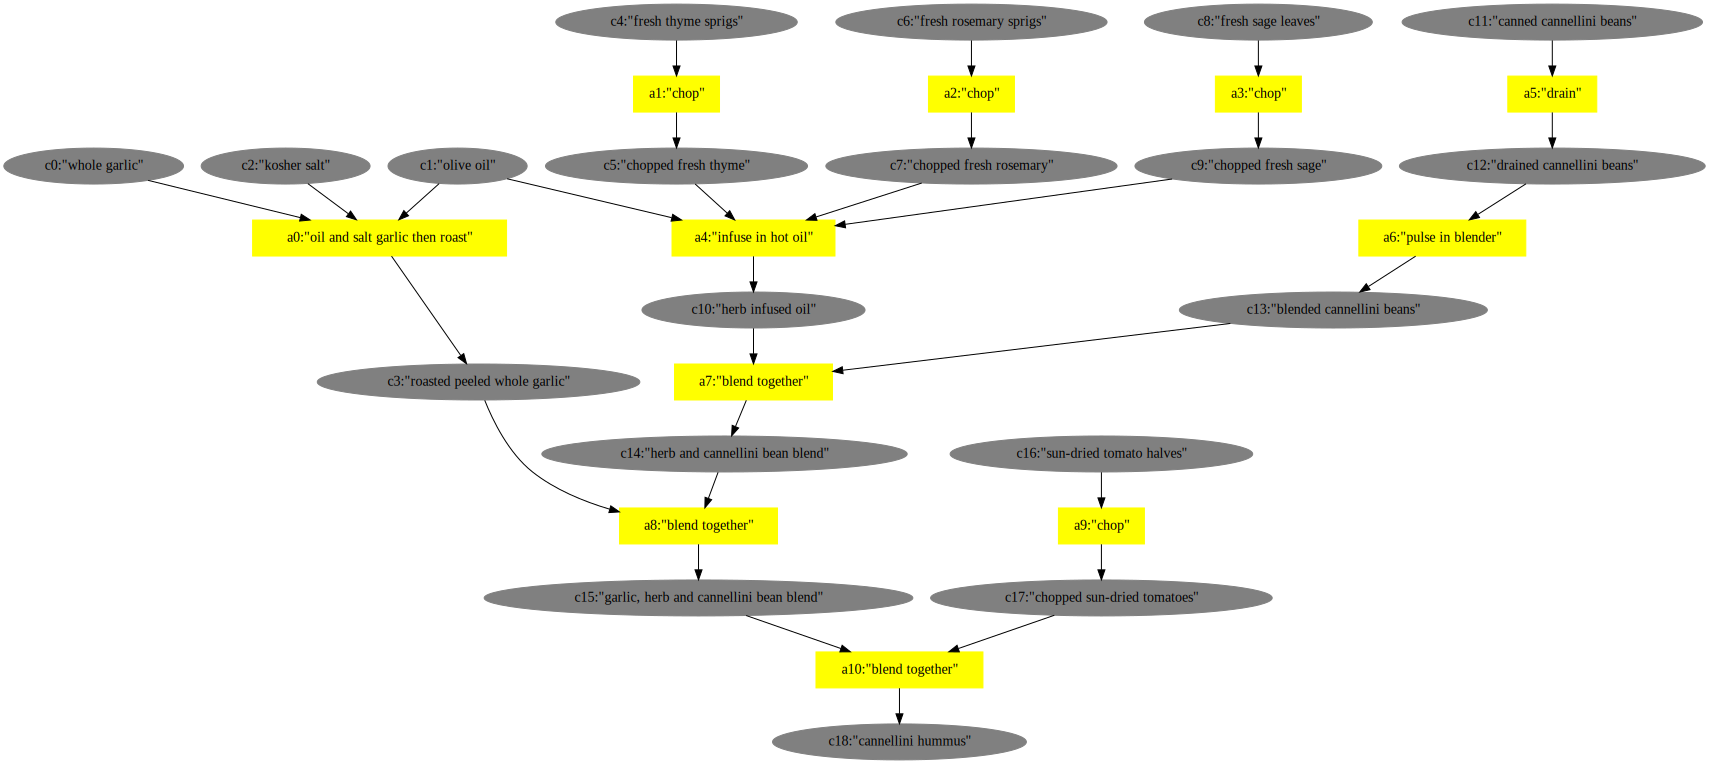

In [10]:
# if you haven't got a correct recipe yet, you may need to select
# your own graph and type function identifiers
recipe = ('rg_cannellini_hummus','tf_cannellini_hummus')

# rerun to get the graphs and type functions
graphs = get_graphs(asp_model)
type_functions = get_type_functions(asp_model)

# recipe_graph_to_dot takes the graphs (collectios of arcs)
# the type_functions and one specific recipe (graph identifier;type
# function identifier pair), then
# finds the associated graph, and type function for that recipe
# and draws it with dot
dot = recipe_graph_to_dot(recipe, graphs, type_functions)
dot

In [14]:
help(dot)

Help on Digraph in module graphviz.graphs object:

class Digraph(graphviz.dot.DigraphSyntax, BaseGraph)
 |  Digraph(name: Optional[str] = None, comment: Optional[str] = None, filename=None, directory=None, format: Optional[str] = None, engine: Optional[str] = None, encoding: Optional[str] = 'utf-8', graph_attr=None, node_attr=None, edge_attr=None, body=None, strict: bool = False, *, renderer: Optional[str] = None, formatter: Optional[str] = None) -> None
 |  
 |  Directed graph source code in the DOT language.
 |  
 |  Args:
 |      name: Graph name used in the source code.
 |      comment: Comment added to the first line of the source.
 |      filename: Filename for saving the source
 |          (defaults to ``name`` + ``'.gv'``).
 |      directory: (Sub)directory for source saving and rendering.
 |      format: Rendering output format (``'pdf'``, ``'png'``, ...).
 |      engine: Layout command used (``'dot'``, ``'neato'``, ...).
 |      renderer: Output renderer used (``'cairo'``, ``

In [11]:
type_functions['tf_cannellini_hummus']

{'c0': '"whole garlic"',
 'c1': '"olive oil"',
 'c2': '"kosher salt"',
 'c3': '"roasted peeled whole garlic"',
 'c4': '"fresh thyme sprigs"',
 'c5': '"chopped fresh thyme"',
 'c6': '"fresh rosemary sprigs"',
 'c7': '"chopped fresh rosemary"',
 'c8': '"fresh sage leaves"',
 'c9': '"chopped fresh sage"',
 'c10': '"herb infused oil"',
 'c11': '"canned cannellini beans"',
 'c12': '"drained cannellini beans"',
 'c13': '"blended cannellini beans"',
 'c14': '"herb and cannellini bean blend"',
 'c15': '"garlic, herb and cannellini bean blend"',
 'c16': '"sun-dried tomato halves"',
 'c17': '"chopped sun-dried tomatoes"',
 'c18': '"cannellini hummus"',
 'a0': '"oil and salt garlic then roast"',
 'a1': '"chop"',
 'a2': '"chop"',
 'a3': '"chop"',
 'a4': '"infuse in hot oil"',
 'a5': '"drain"',
 'a6': '"pulse in blender"',
 'a7': '"blend together"',
 'a8': '"blend together"',
 'a9': '"chop"',
 'a10': '"blend together"'}

## Older code

In [12]:

lp_fnames = ["GraphRecipes.lp","ScratchExample.lp"]
lp_fnames = ["GraphRecipes.lp","SnacksOnToastExample.lp"]

In [13]:
ctl = clingo.Control()
for lp_fname in lp_fnames:
    ctl.load(lp_fname)
ctl.ground([("base", [])])
#answer_sets = []
result = ctl.solve(on_model=lambda m: print("Answer: {}".format(m)))

<cmd>: error: file could not be opened:
  GraphRecipes.lp



RuntimeError: parsing failed

In [ ]:
ctl = clingo.Control()
for lp_fname in lp_fnames:
    ctl.load(lp_fname)
ctl.ground([("base", [])])
models = []
with ctl.solve(yield_=True) as handle:
    for model in handle:
        models.append(model.symbols(shown=True))
models

In [ ]:
for atom in models[0]:
    print(f"atom.type = {atom.type}")
    if atom.type == symbol.SymbolType.Function:
        print(f"atom.name = {atom.name}")
        print(f"atom.arguments = {atom.arguments}")
        print(f"str(atom) = {str(atom)}")
        #print(f"atom.negative = {atom.negative}")
        #print(f"atom.number = {atom.number}")
        #print(f"atom.positive = {atom.positive}")
        #print(f"atom.string = {atom.string}")
